In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [6]:
from datasets import get_dataset_config_names
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


XTREME has 183 configurations


In [7]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]


['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [8]:
panx_subsets[4]

'PAN-X.de'

In [9]:
from datasets import load_dataset
panx_dataset = load_dataset("xtreme", name="PAN-X.de")
panx_dataset

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [10]:

# hide_output
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
# Return a DatasetDict if a key doesn't exist
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [11]:
panx_ch["en"]["test"]["tokens"][0]

['In',
 'the',
 'end',
 'he',
 'chose',
 'to',
 'stay',
 'in',
 'Örebro',
 'and',
 'signed',
 'with',
 'Örebro',
 'SK',
 'at',
 'the',
 'start',
 'of',
 '2012',
 '.']

In [12]:
import pandas as pd
pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs},
 index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [13]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
 print(f"{key}: {value}")


tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [14]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)


ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


In [15]:
def create_tag_names(batch):
 return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}
panx_de = panx_ch["de"].map(create_tag_names)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [16]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [17]:
from collections import Counter
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
      for row in dataset["ner_tags_str"]:
          for tag in row:
              if tag.startswith("B"):
                  tag_type = tag.split("-")[1]
                  split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [18]:
from transformers import AutoTokenizer
bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

# Build your own model

In [19]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [20]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
 config_class = XLMRobertaConfig
 def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights
        self.init_weights()

 def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
 labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
        token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
              loss_fct = nn.CrossEntropyLoss()
              loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
              # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
        hidden_states=outputs.hidden_states,
        attentions=outputs.attentions)


In [21]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [22]:
from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
 num_labels=tags.num_classes,
 id2label=index2tag, label2id=tag2index)


In [23]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
 .from_pretrained(xlmr_model_name, config=xlmr_config)
   .to(device))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
text = "Jack Sparrow loves New York!"
xlmr_tokens = xlmr_tokenizer(text).tokens()
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [25]:
def tag_text(text, tags, model, tokenizer):
 # Get tokens with special characters
 tokens = tokenizer(text).tokens()
 # Encode the sequence into IDs
 input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
 # Get predictions as distribution over 7 possible classes
 outputs = model(input_ids)[0]
 # Take argmax to get most likely class per token
 predictions = torch.argmax(outputs, dim=2)
 # Convert to DataFrame
 preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
 return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [26]:
words, labels = de_example["tokens"], de_example["ner_tags"]


In [27]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [28]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [29]:
previous_word_idx = None
label_ids = []
for word_idx in word_ids:
 if word_idx is None or word_idx == previous_word_idx:
  label_ids.append(-100)
 elif word_idx != previous_word_idx:
  label_ids.append(labels[word_idx])
  previous_word_idx = word_idx
labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]
pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [30]:
def tokenize_and_align_labels(examples):
 tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
 is_split_into_words=True)
 labels = []
 for idx, label in enumerate(examples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx is None or word_idx == previous_word_idx:
          label_ids.append(-100)
      else:
         label_ids.append(label[word_idx])
      previous_word_idx = word_idx
    labels.append(label_ids)
 tokenized_inputs["labels"] = labels
 return tokenized_inputs

In [31]:
def encode_panx_dataset(corpus):
 return corpus.map(tokenize_and_align_labels, batched=True,
 remove_columns=['langs', 'ner_tags', 'tokens'])

In [32]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])


Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [3]:
!pip install git+https://github.com/huggingface/transformers


  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-t11qxjie
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-t11qxjie
  Resolved https://github.com/huggingface/transformers to commit 74a207404e8d4524d1fdc4aa23789694f9eef347
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9231578 sha256=9b25dcb3fa0cd9d66d38b5d824d08d140c51dd2d2ac53711823ef2a7a550b11c
  Stored in directory: /tmp/pip-ephem-wheel-cache-9rpu1_la/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [4]:
!pip install git+https://github.com/huggingface/accelerate


  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-grrjbs40
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-grrjbs40
  Resolved https://github.com/huggingface/accelerate to commit 1f7a79b428749f45187ec69485f2c966fe21926e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-

In [33]:
import numpy as np
def align_predictions(predictions, label_ids):
 preds = np.argmax(predictions, axis=2)
 batch_size, seq_len = preds.shape
 labels_list, preds_list = [], []
 for batch_idx in range(batch_size):
      example_labels, example_preds = [], []
      for seq_idx in range(seq_len):
      # Ignore label IDs = -100
          if label_ids[batch_idx, seq_idx] != -100:
              example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
              example_preds.append(index2tag[preds[batch_idx][seq_idx]])
      labels_list.append(example_labels)
      preds_list.append(example_preds)
 return preds_list, labels_list

In [34]:
from transformers import TrainingArguments
num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
 output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
 per_device_train_batch_size=batch_size,
 per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
 save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
 logging_steps=logging_steps, push_to_hub=True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [35]:
from huggingface_hub import notebook_login
notebook_login()

In [36]:
!pip install seqeval

In [41]:
from seqeval.metrics import f1_score
def compute_metrics(eval_pred):
 y_pred, y_true = align_predictions(eval_pred.predictions,
 eval_pred.label_ids)
 return {"f1": f1_score(y_true, y_pred)}


In [42]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [43]:
def model_init():
 return (XLMRobertaForTokenClassification
 .from_pretrained(xlmr_model_name, config=xlmr_config)
 .to(device))

In [44]:
from transformers import Trainer
trainer = Trainer(model_init=model_init, args=training_args,
 data_collator=data_collator, compute_metrics=compute_metrics,
 train_dataset=panx_de_encoded["train"],
 eval_dataset=panx_de_encoded["validation"],
 tokenizer=xlmr_tokenizer)


In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.253900,0.150540,0.824563
2,0.126800,0.137969,0.850265
3,0.079400,0.136314,0.865804


TrainOutput(global_step=1575, training_loss=0.15328798036726693, metrics={'train_runtime': 615.5947, 'train_samples_per_second': 61.307, 'train_steps_per_second': 2.559, 'total_flos': 862324400720376.0, 'train_loss': 0.15328798036726693, 'epoch': 3.0})

In [46]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1719076303.91ffb96171d2.381.0:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Mahmoud3899/xlm-roberta-base-finetuned-panx-de/commit/1d191a74282aa9594eff6e786a1dfd7e131a58e6', commit_message='Training completed!', commit_description='', oid='1d191a74282aa9594eff6e786a1dfd7e131a58e6', pr_url=None, pr_revision=None, pr_num=None)

In [47]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [48]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
 # Convert dict of lists to list of dicts suitable for data collator
 features = [dict(zip(batch, t)) for t in zip(*batch.values())]
 # Pad inputs and labels and put all tensors on device
 batch = data_collator(features)
 input_ids = batch["input_ids"].to(device)
 attention_mask = batch["attention_mask"].to(device)
 labels = batch["labels"].to(device)
 with torch.no_grad():
 # Pass data through model
      output = trainer.model(input_ids, attention_mask)
      # logit.size: [batch_size, sequence_length, classes]
      # Predict class with largest logit value on classes axis
      predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
 # Calculate loss per token after flattening batch dimension with view
 loss = cross_entropy(output.logits.view(-1, 7),
 labels.view(-1), reduction="none")
 # Unflatten batch dimension and convert to numpy array
 loss = loss.view(len(input_ids), -1).cpu().numpy()
 return {"loss":loss, "predicted_label": predicted_label}


In [49]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()


Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [51]:
df.head()

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.013388608, 0.0, 0.01115031, 0.00829453...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-O...","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00026258358, 0.0, 0.0, 0.0, 0.0, 1.516...","[I-LOC, O, O, O, O, O, B-LOC, I-LOC, I-LOC, I-...","[<s>, ▁WE, ITE, RL, EIT, UNG, ▁Luz, ky, j, ▁a,..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.0001212285, 9.4647694e-05, 0.000112408...","[O, O, O, O, O, B-ORG, O, I-ORG, O, O, O, O, O...","[<s>, ▁entdeckt, ▁und, ▁gehört, ▁der, ▁Spek, t..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 5, -100, 0, 0, -100]","[0.0, 0.00015531764, 0.00014804698, 0.00016187...","[B-LOC, O, O, O, B-LOC, I-LOC, O, O, B-LOC, B-...","[<s>, ▁**, ▁', ▁'', ▁, Bretagne, ▁'', ▁', </s>]"
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.00011109689, 0.00011276563, 0.00011169...","[O, O, O, O, O, O, O, O, O, O, O, O, B-ORG, I-...","[<s>, ▁Nach, ▁einem, ▁Jahr, ▁bei, ▁diesem, ▁Ve..."


In [55]:

# hide_output
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
#df["predicted_label"] = df["predicted_label"].apply(
#    lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(
    lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.013388608, 0.0, 0.01115031, 0.00829453...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [56]:
# hide_output
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,1.52,B-LOC,▁Luz
1,10,1,I-ORG,2.72,I-LOC,▁a


In [57]:

(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)


,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁/,▁(,▁und,▁),▁'',▁die
count,6066,989,1388,808,163,246,1171,246,2898,860
mean,0.03,0.14,0.09,0.14,0.64,0.32,0.07,0.31,0.03,0.06
sum,205.19,136.77,127.08,113.73,103.89,79.13,76.95,76.39,75.53,53.74


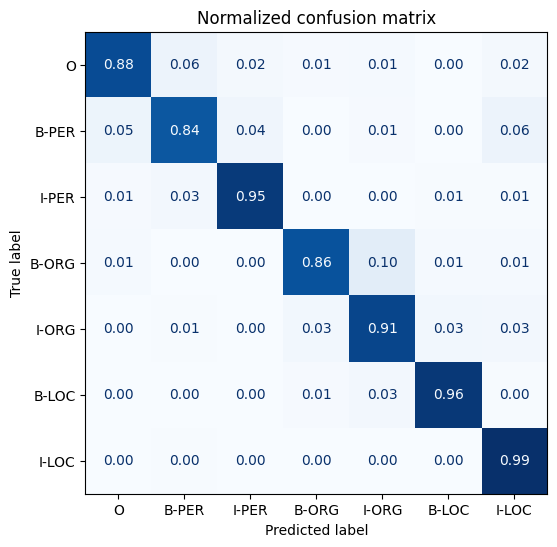

In [59]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
      cm = confusion_matrix(y_true, y_preds, normalize="true")
      fig, ax = plt.subplots(figsize=(6, 6))
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
      disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
      plt.title("Normalized confusion matrix")
      plt.show()
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
 tags.names)


In [60]:
def get_f1_score(trainer, dataset):
 return trainer.predict(dataset).metrics["test_f1"]

In [61]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.866


In [62]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [63]:
def evaluate_lang_performance(lang, trainer):
 panx_ds = encode_panx_dataset(panx_ch[lang])
 return get_f1_score(trainer, panx_ds["test"])

In [64]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score of [de] model on [fr] dataset: 0.702


In [65]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score of [de] model on [it] dataset: 0.688


In [66]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")


Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.583


In [67]:
def train_on_subset(dataset, num_samples):
 train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
 valid_ds = dataset["validation"]
 test_ds = dataset["test"]
 training_args.logging_steps = len(train_ds) // batch_size
 trainer = Trainer(model_init=model_init, args=training_args,
 data_collator=data_collator, compute_metrics=compute_metrics,
 train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
 trainer.train()
 if training_args.push_to_hub:
    trainer.push_to_hub(commit_message="Training completed!")
 f1_score = get_f1_score(trainer, test_ds)
 return pd.DataFrame.from_dict({"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [68]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [69]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.611400,1.290540,0.023221
2,1.186100,0.994059,0.194721
3,0.996400,0.918272,0.258691


,num_samples,f1_score
0,250,0.260191


In [75]:
metrics_df = metrics_df[:].to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [81]:
# hide_output
for num_samples in [500, 1000, 2000, 4000]:
    data =  train_on_subset(panx_fr_encoded, num_samples)
    metrics_df = pd.concat([metrics_df, data], ignore_index=True)

    #metrics_df = metrics_df.append(data, ignore_index=True)
    break

Epoch,Training Loss,Validation Loss,F1
1,1.424700,1.023299,0.273481
2,0.868600,0.658805,0.558438
3,0.594300,0.569413,0.631595


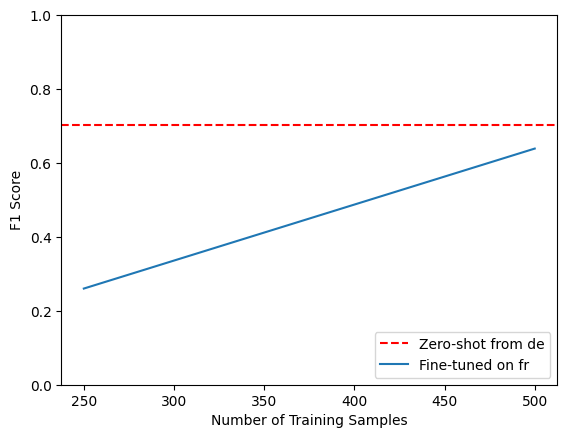

In [83]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()


In [84]:
from datasets import concatenate_datasets
def concatenate_splits(corpora):
 multi_corpus = DatasetDict()
 for split in corpora[0].keys():
      multi_corpus[split] = concatenate_datasets([corpus[split] for corpus in corpora]).shuffle(seed=42)
 return multi_corpus
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [85]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"
trainer = Trainer(model_init=model_init, args=training_args,
 data_collator=data_collator, compute_metrics=compute_metrics,
 tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
 eval_dataset=panx_de_fr_encoded["validation"])
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.283600,0.185854,0.821246
2,0.148400,0.163191,0.848699
3,0.095300,0.163861,0.859062


CommitInfo(commit_url='https://huggingface.co/Mahmoud3899/xlm-roberta-base-finetuned-panx-de-fr/commit/0e28293837191b8156ec8b80e17177cdc699f897', commit_message='Training completed!', commit_description='', oid='0e28293837191b8156ec8b80e17177cdc699f897', pr_url=None, pr_revision=None, pr_num=None)

In [86]:
for lang in langs:
 f1 = evaluate_lang_performance(lang, trainer)
 print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

F1-score of [de-fr] model on [de] dataset: 0.865


F1-score of [de-fr] model on [fr] dataset: 0.859


F1-score of [de-fr] model on [it] dataset: 0.799


F1-score of [de-fr] model on [en] dataset: 0.674


In [88]:
corpora = [panx_de_encoded]
# Exclude German from iteration
for lang in langs[1:]:
 training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
 # Fine-tune on monolingual corpus
 ds_encoded = encode_panx_dataset(panx_ch[lang])
 metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
 # Collect F1-scores in common dict
 f1_scores[lang][lang] = metrics["f1_score"][0]
 corpora.append(ds_encoded)


Epoch,Training Loss,Validation Loss,F1
1,0.564700,0.324170,0.772765
2,0.267100,0.267203,0.820195
3,0.174400,0.274962,0.849510


Epoch,Training Loss,Validation Loss,F1
1,0.721700,0.319269,0.734277
2,0.273600,0.276007,0.805522
3,0.183800,0.261933,0.832099


Epoch,Training Loss,Validation Loss,F1
1,1.047900,0.485380,0.585653
2,0.460400,0.399503,0.660460
3,0.379700,0.390541,0.686066


In [89]:
corpora_encoded = concatenate_splits(corpora)

In [90]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"
trainer = Trainer(model_init=model_init, args=training_args,
 data_collator=data_collator, compute_metrics=compute_metrics,
 tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
 eval_dataset=corpora_encoded["validation"])
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.299000,0.207398,0.807836
2,0.158700,0.170465,0.846132
3,0.101200,0.175783,0.855783


CommitInfo(commit_url='https://huggingface.co/Mahmoud3899/xlm-roberta-base-finetuned-panx-all/commit/80ace8861df77d89bdafb7bcacb498d4dbae3330', commit_message='Training completed!', commit_description='', oid='80ace8861df77d89bdafb7bcacb498d4dbae3330', pr_url=None, pr_revision=None, pr_num=None)

In [91]:
for idx, lang in enumerate(langs):
 f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])
scores_data = {"de": f1_scores["de"],
 "each": {lang: f1_scores[lang][lang] for lang in langs},
 "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
 inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8658,0.7021,0.6877,0.5830
each,0.8658,0.8411,0.8180,0.6870
all,0.8685,0.8654,0.8669,0.7678
